In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
image_path = r"H:\My Drive\alnoabih_2.tif"

In [3]:
ds = gdal.Open(image_path)

C:\Users\owd1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [4]:
# Get raster size
x_size = ds.RasterXSize
y_size = ds.RasterYSize
print(f"Size: {x_size} x {y_size}")

Size: 10 x 8


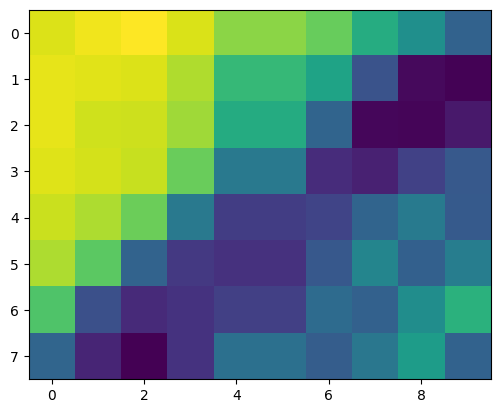

In [6]:
band = ds.GetRasterBand(4)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)

In [7]:
num_bands = ds.RasterCount
num_bands

23

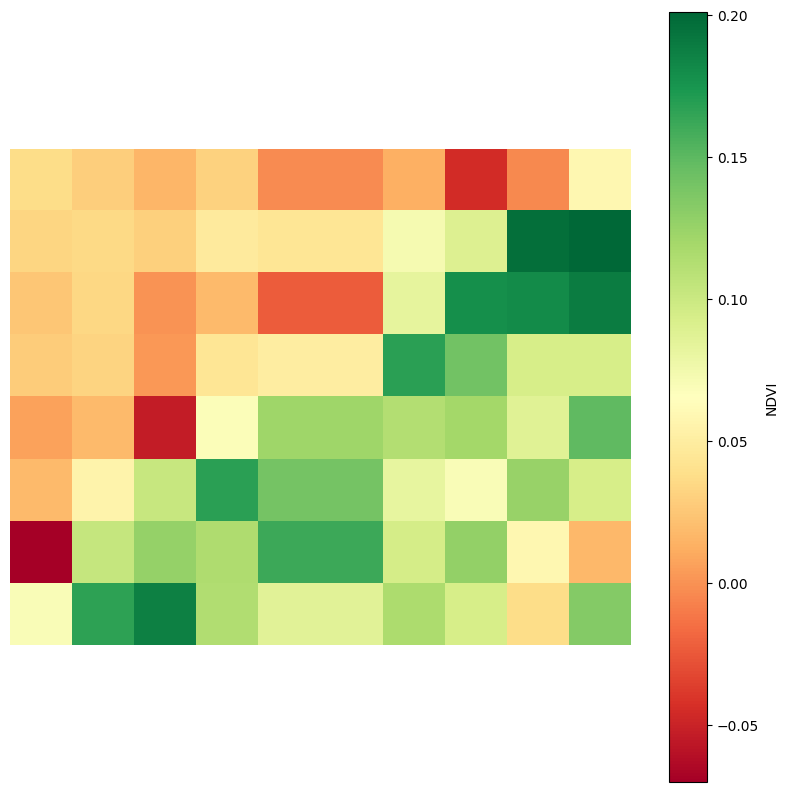

In [8]:

def read_band(band_number):
    band = ds.GetRasterBand(band_number).ReadAsArray().astype(np.float32)
    return band
red = read_band(4)  #  Band 1 is 4 (red band) 
nir = read_band(5)  # band 2 is 8 is (NIR band)\



ndvi = (nir - red) / (nir + red )


plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.axis('off')  # Turn off the axis
plt.show()

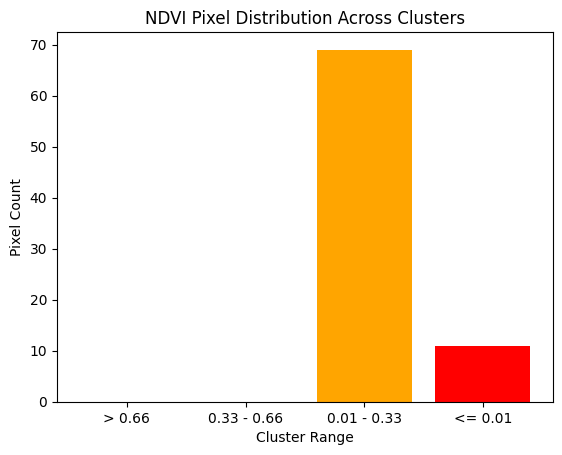

[0, 0, 69, 11]


In [9]:
cluster_counts = [0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(ndvi.shape[0]):  
    for col in range(ndvi.shape[1]):  
        value = ndvi[row, col]
        if value > 0.66:
            cluster_counts[0] += 1
        elif value > 0.33:
            cluster_counts[1] += 1
        elif value > 0.01:
            cluster_counts[2] += 1
        else:
            cluster_counts[3] += 1

clusters = ['> 0.66', '0.33 - 0.66', '0.01 - 0.33', '<= 0.01']
plt.bar(clusters, cluster_counts, color=['green', 'yellow', 'orange', 'red'])
plt.title('NDVI Pixel Distribution Across Clusters')
plt.xlabel('Cluster Range')
plt.ylabel('Pixel Count')
plt.show()
print(cluster_counts)


# Another way to present the data

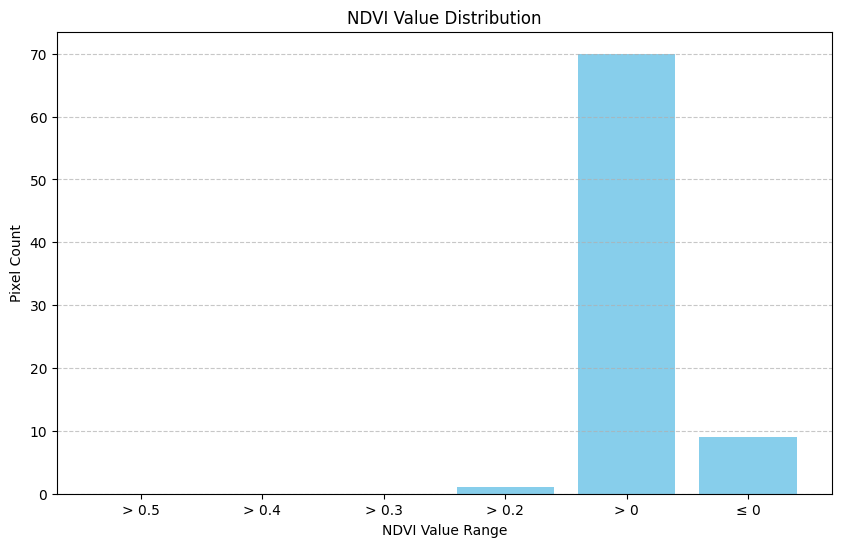

[0, 0, 0, 1, 70, 9]


In [10]:
cluster_counts = [0, 0, 0, 0, 0, 0]

# Loop over each pixel in the NDVI array
for row in range(ndvi.shape[0]):  
    for col in range(ndvi.shape[1]): 
        value = ndvi[row, col]
        if value > 0.5:
            cluster_counts[0] += 1
        elif value > 0.4:
            cluster_counts[1] += 1
        elif value >0.3:
            cluster_counts[2] += 1
        elif value >0.2:
            cluster_counts[3] += 1

        elif value > 0:
            cluster_counts[4] += 1
        else:
            cluster_counts[5] += 1


cluster_labels = ['> 0.5', '> 0.4', '> 0.3', '> 0.2', '> 0', '≤ 0']

plt.figure(figsize=(10, 6))
plt.bar(cluster_labels, cluster_counts, color='skyblue')
plt.title('NDVI Value Distribution')
plt.xlabel('NDVI Value Range')
plt.ylabel('Pixel Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(cluster_counts)


In [11]:
cluster_counts = [0, 0]

for row in range(ndvi.shape[0]):  
    for col in range(ndvi.shape[1]): 
        value = ndvi[row, col]
        if value > 0.22:
            cluster_counts[0] += 1
        else:
            cluster_counts[1] += 1

print(cluster_counts)

[0, 80]


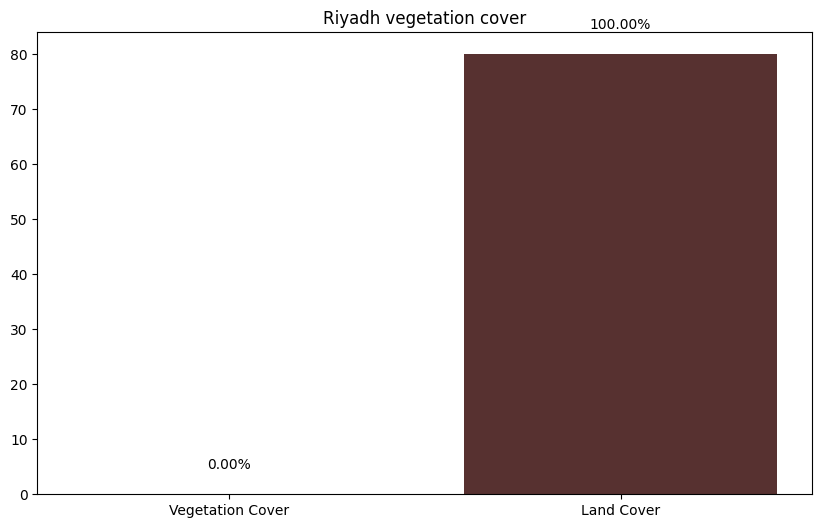

In [12]:
total_count = sum(cluster_counts)

# Calculating percentages for each cluster
percentages = [count / total_count * 100 for count in cluster_counts]
cluster_labels = ['Vegetation Cover', 'Land Cover']
colors = ['green', '#573130']
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Riyadh vegetation cover')

# Adding percentage annotations on each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * total_count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()
